<a href="https://colab.research.google.com/github/Elibaque/SIM_YAC_ELIANA_UPSE2023/blob/main/Ecuacion_de_difusividad_variacion_Deltax%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
L=1000
dx=200
Distance=np.arange(0,L+1,dx)
P01=np.ones_like(Distance)
print(P01)

[1 1 1 1 1 1]


In [2]:
PYac= 4000
Pfronted=0
Pfrontei=0
Tiempo=100
DT=10

Pdt=np.zeros_like(Distance)

In [3]:
P01=np.ones_like(Distance)
P01=P01*PYac
P01[0]=Pfrontei
P01[len(P01)-1]=Pfronted
P0in=P01
Pdt=P01
t=DT

In [8]:
def Presdt(P1, P2, P3, Deltat, Deltax):
  return (((P1 - 2 * P2 + P3) / (Deltax**2)) * Deltat) + P2

In [9]:
while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
    t=t+DT
    P0in=Pdt
    P01=np.append(P01,Pdt)

In [10]:
print(P01)

[   0 3999 3999 3999 3998    0    0 3999 3999 3999 3998    0    0 3998
 3998 3998 3997    0    0 3997 3997 3997 3996    0    0 3996 3996 3996
 3995    0    0 3995 3995 3995 3994    0    0 3994 3994 3994 3993    0
    0 3993 3993 3993 3992    0    0 3992 3992 3992 3991    0    0 3991
 3991 3991 3990    0]


# ECUACION DE DIFUSIVIDAD - VARIACION DE DISTANCIA


In [11]:
import numpy as np
import math
L=1000 
dx=100
Distance=np.arange(0,L+1,dx)
P01=np.ones_like(Distance) 
print(P01)

[1 1 1 1 1 1 1 1 1 1 1]


In [16]:
PYac=4000
PFronted=0 
PFrontei=0 
Tiempo=100000
DT=10
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)

In [17]:
P01=np.ones_like(Distance)
P01=P01*PYac
P01[0]=PFrontei
P01[len(P01)-1]=PFronted
P0in=P01 
Pdt=P01 
t=DT 

In [18]:
def Presdt(P1, P2, P3, Deltat, Deltax):
  return (((P1 - 2 * P2 + P3) / (Deltax**2)) * Deltat) + P2

In [21]:
PXX[0]=P01
while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
    PXX[math.floor(t/DT)]=Pdt
    t=t+DT
    P0in=Pdt
    P01=np.append(P01,Pdt)

In [23]:
PXX

array([[   0., 4000., 4000., ..., 4000., 4000.,    0.],
       [   0., 3996., 3999., ..., 3999., 3995.,    0.],
       [   0., 3992., 3998., ..., 3998., 3991.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

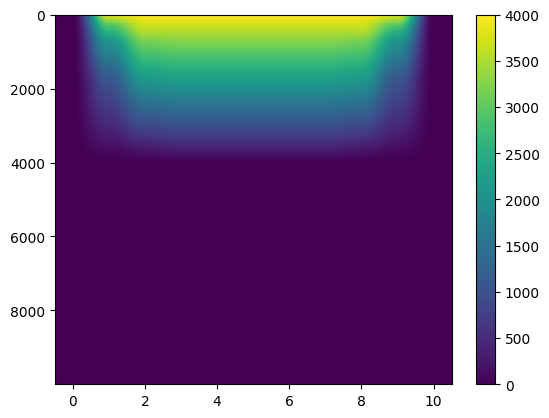

In [24]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PXX,aspect='auto')
plt.colorbar()

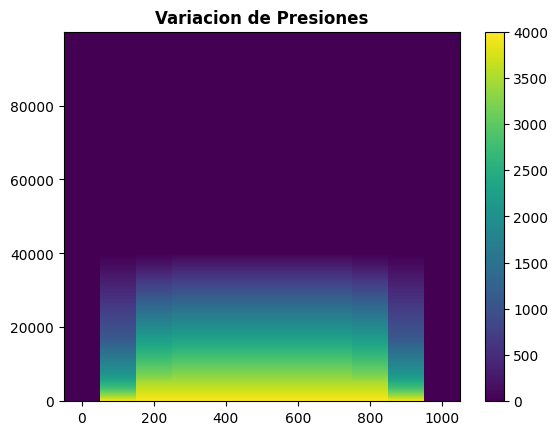

In [28]:
c = plt.pcolormesh(Distance,VectorTiempo,PXX)
plt.colorbar(c)
 
plt.title('Variacion de Presiones', fontweight ="bold")
plt.show()